# -----Spark Foundation Data Science Task-1-----
***PROBLEM STATEMENT :-- predict the precentage of an student based on the number of study hours.***

***SWETA PANDEY***    

In [1]:
#Importig all libraries required in this notebook


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline


In [2]:
# Reading data from remote link

student=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
student.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***Checking if there are any Null values***

In [3]:
student.isnull==True

False

***There are no NULL values in the Dataset so, plot the data points on 2-D graph and see if we can find any Relationship between the data.***

# Exploratory Data Analysis:
***Let's plot our data point ***

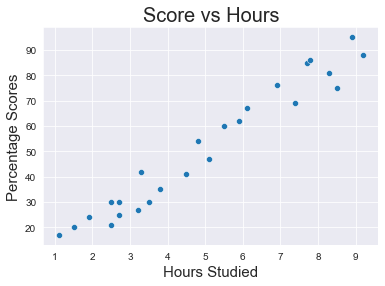

In [8]:
#plotting the distribution of scores

sns.set_style('darkgrid')
sns.scatterplot(y =student['Scores'], x=student['Hours'])
plt.title('Score vs Hours', size=20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()

***In the given graph, we can clearly see that there is a positive linear Between the number of hours studied and percentage of score***

# Plotting Regression line:

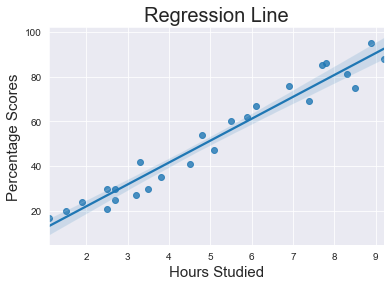

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
sns.regplot(x=student['Hours'], y=student['Scores'])
plt.title('Regression Line', size=20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores',size=15)
plt.show()
print(student.corr())

# preparing the data:
***divide the data into "attributes" (inputs) and 'labels'(outputs).***

In [10]:
x = student.iloc[:, :-1].values
y = student.iloc[:, 1].values

# splitting the data:
***Split data into traning and test sets.***

In [12]:
#spliting our data into training and testing sets

train_x, test_x , train_y, test_y = train_test_split(x,y,random_state =0)


# Training the Algorithm:

In [13]:
regression = LinearRegression()
regression.fit(train_x,train_y)

print("Training Complete.")
print("Model Trained")

Training Complete.
Model Trained


# Precditing the Percentage:

In [14]:
pred_y = regression.predict(test_x)
prediction = pd.DataFrame({'Hours':[i[0] for i in test_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Actual and Predicted Marks:

In [16]:
df =pd.DataFrame({'Actual': test_y , 'Predicted' : pred_y})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Plotting Actual and Predicted Marks:

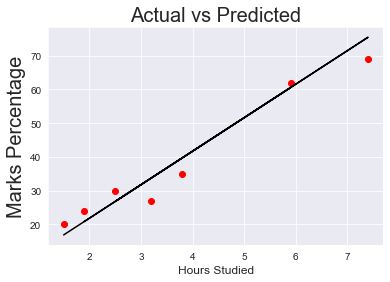

In [17]:
plt.scatter(x=test_x, y=test_y, color="Red")
plt.plot(test_x, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Percentage', size=20)
plt.show()

# Predicting the score if studied for 9.25 hours/day: 

In [18]:
hours=[9.25]
answer=regression.predict([hours])
print('Score= {}'.format(round(answer[0],3)))


Score= 93.893


# Evaluating the model:

In [21]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(test_y, pred_y))

Mean Absolute Error:  4.130879918502486
